Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: colorspace

Loading required package: khroma

Loading required package: ggplot2

Loading required package: ggpattern

Loading required package: reshape2

Loading required package: tidyverse

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_confl

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

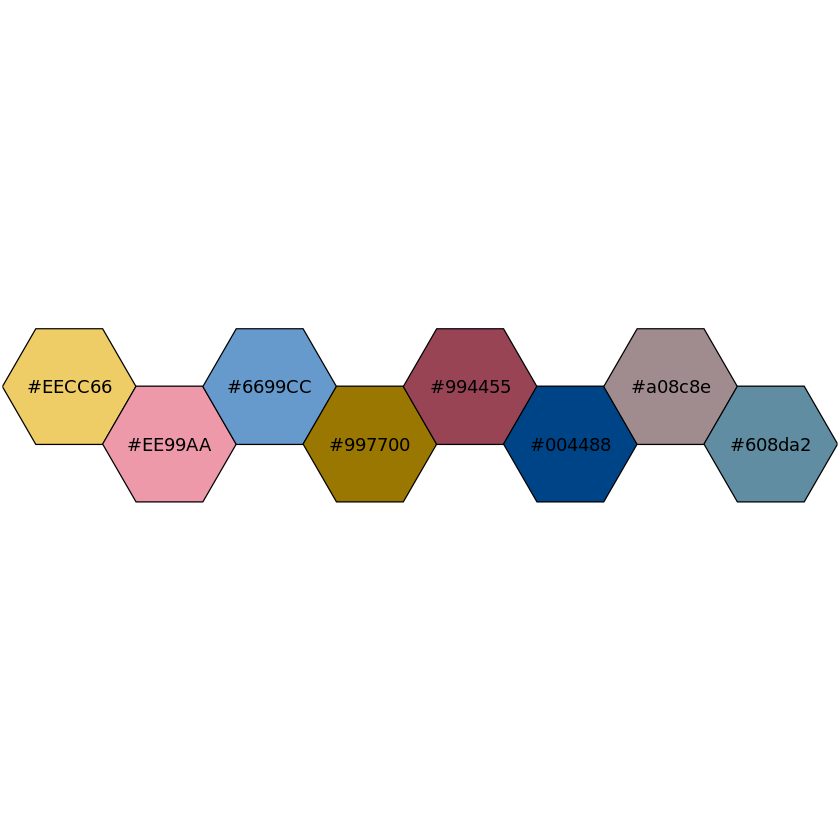

In [1]:
f_func <- "../functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))
f_path <- "../dirs.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_path, '--to=script', '--stdout'), stdout = TRUE)))
f_cols <- "../cols.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_cols, '--to=script', '--stdout'), stdout = TRUE)))

In [2]:
lst_fisher_genus <- readRDS(paste0(INT_SPL, "lst_fisher_genus.Rdata"))
lst_fisher_species <- readRDS(paste0(INT_SPL, "lst_fisher_species.Rdata"))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


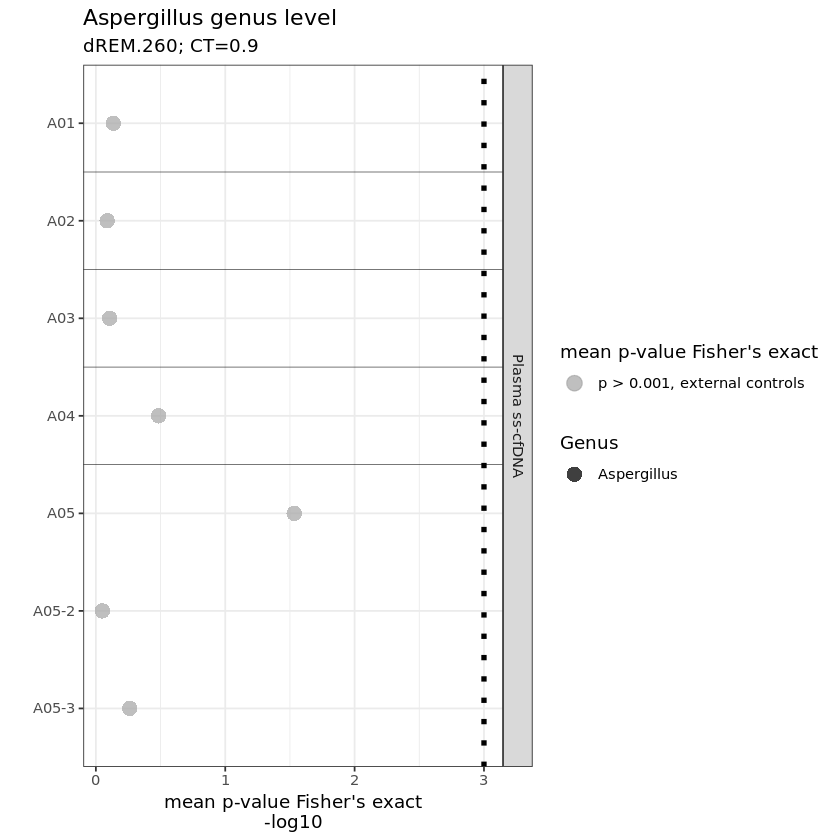

In [3]:
genus_db="EPRSFv64MCAspDM"
int_ctrls_fisher_genus <- lst_fisher_genus[[genus_db]] %>% 
    melt(id.vars = c('db','sample','Asp_genus_count','total_read_count','control_type','origin'), 
                 variable.name = "test_type", value.name = "p.value") %>%  
        mutate(taxName = "Aspergillus                  ") %>% 
        filter(test_type == "fisher.t.ext") %>% 
        filter(grepl(sample, pattern = "ctrl$") | grepl(sample, pattern = "ctrl[2-3]")) %>%
        mutate(sample = factor(x = sample, levels = c(rev(unique(as.factor(lst_fisher_genus[[genus_db]]$sample)))))) %>% 
        mutate(sample_short = str_sub(sample, 1, 3)) %>% 
        filter(!is.na(p.value)) %>%  
        filter(sample_short %in% c("A01", "A02", "A03", "A04", "A05")) %>% 
        mutate(sample_short = ifelse(!grepl(sample, pattern = "Pctrl$"), 
                                    yes = paste0(sample_short, sub(sample, pattern = ".*Pctrl", replacement = "-")), 
                                     no = sample_short)) %>% 
        mutate(col_test = ifelse(test_type == "fisher.t.int" & p.value <= 0.001, 
                                 yes = "p < 0.001, internal control",
                          ifelse(test_type == "fisher.t.ext" & p.value <= 0.001, 
                                 yes = "p < 0.001, external controls", 
                          ifelse(test_type == "fisher.t.int" & p.value > 0.001, 
                                 yes = "p > 0.001, internal control", 
                          ifelse(test_type == "fisher.t.ext" & p.value > 0.001, 
                                 yes = "p > 0.001, external controls", no = NA))))) %>% 
        mutate(p.value = -log10(p.value)) %>% 
        ggplot(aes(x = p.value, y = sample_short, col = col_test, shape = taxName)) + 
            geom_vline(xintercept = -log10(0.001), linetype="dotted", color = "black", size=1.5) + 
            geom_hline(yintercept = seq(3.5,6.5,1), linetype = 1 , color = "black", size = 0.15) + 
            geom_point(size = 4, alpha = 0.5) + 
            geom_point(data = . %>% filter(col_test != "p > 0.001"), size = 4, alpha = 0.5) +
            facet_grid(rows = vars(origin), 
                       drop = FALSE, scales = "free_y", space = "free") + 
            ylab("") + xlab("mean p-value Fisher's exact\n-log10") + 
            theme_bw() + labs(color = "mean p-value Fisher's exact", shape = "Genus") + 
            guides(color = guide_legend(order = 1), shape = guide_legend(order = 2)) + 
            scale_color_manual(values = c(#"p < 0.001, internal control" = colors_mc[6], 
                                          #"p < 0.001, external controls" = colors_mc[5], 
                                          #"p > 0.001, internal control" = alpha("darkgrey", alpha = 0.2)#,
                                          "p > 0.001, external controls" = alpha("darkgrey", alpha = 0.2)
                                         ),
                            labels = c(#expression(p <= 0.001 * ", internal control"), 
                                      #expression(p <= 0.001 * ", external controls"), 
                                      #"p > 0.001, internal control", 
                                      "p > 0.001, external controls")) + 
            ggtitle("Aspergillus genus level", subtitle = "dREM.260; CT=0.9") + 
            scale_y_discrete(limits=rev) 
int_ctrls_fisher_genus

In [13]:
ext_ctrls_fisher_genus <- lst_fisher_genus[['EPRSFv64MCAspDM']] %>% 
    melt(id.vars = c('db','sample','Asp_genus_count','total_read_count','control_type','origin'), 
                 variable.name = "test_type", value.name = "p.value") %>% 
        mutate(db = ifelse(db == "EPRSc2", yes = "cRE.21", no = as.character(db))) %>% 
        mutate(db = ifelse(db == "EPRSFv64MCAspDM", yes = "dREM.260", no = as.character(db))) %>% 
        mutate(db = factor(db, levels = c("dREM.260", "cRE.21"))) %>% 
        mutate(taxName = "Aspergillus                   ") %>% 
        filter(test_type == "fisher.t.ext") %>% 
        filter(grepl(sample, pattern = "^H")) %>% 
        filter(grepl(sample, pattern = "ctrl$")) %>% 
        mutate(sample = factor(x = sample, levels = c(rev(unique(as.factor(.$sample)))))) %>% 
        mutate(sample_short = str_sub(sample, 1, 3)) %>% 
        filter(!is.na(p.value)) %>%  
        mutate(col_test = ifelse(test_type == "fisher.t.int" & p.value <= 0.001, 
                                 yes = "p < 0.001, internal control",
                          ifelse(test_type == "fisher.t.ext" & p.value <= 0.001, 
                                 yes = "p < 0.001, external controls", 
                          ifelse(test_type == "fisher.t.int" & p.value > 0.001, 
                                 yes = "p > 0.001, internal control", 
                          ifelse(test_type == "fisher.t.ext" & p.value > 0.001, 
                                 yes = "p > 0.001, external controls", no = NA))))) %>% 
        mutate(p.value = -log10(p.value)) %>% 
        ggplot(aes(x = p.value, y = sample_short, col = col_test, shape = taxName)) + 
            geom_rect(data = . %>% filter(db == "cRE.21"), aes(fill = "red"),
                xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf, alpha = 0.02) +
            geom_vline(xintercept = -log10(0.001), linetype="dotted", color = "black", size=1.5) + 
            geom_hline(yintercept = seq(1.5,10.5,1), linetype = 1 , color = "black", size = 0.15) + 
            geom_point(size = 4, alpha = 0.5) + 
            geom_point(data = . %>% filter(col_test != "p > 0.001"), size = 4, alpha = 0.5) +
            facet_grid(rows = vars(origin), 
                       drop = FALSE, scales = "free_y", space = "free") + 
            ylab("") + xlab("mean p-value Fisher's exact\n-log10") + 
            theme_bw() + labs(color = "mean p-value Fisher's exact", shape = "Genus") + #guides(fill = "none") +
            scale_color_manual(values = c("p < 0.001, internal control" = colors_mc[6], 
                                          "p < 0.001, external controls" = colors_mc[5], 
                                          "p > 0.001, internal control" = alpha("darkgrey", alpha = 0.2),
                                          "p > 0.001, external controls" = alpha("darkgrey", alpha = 0.2))) + 
            ggtitle("Aspergillus genus level") + 
            scale_y_discrete(limits=rev) 

In [5]:
species_db="EPRSc2"
int_ctrls_fisher_species <- lst_fisher_species[[species_db]] %>% 
    melt(id.vars = c('taxName','count','db','threshold','sample','control_type','origin'), 
                 variable.name = "test_type", value.name = "p.value") %>% 
        filter(test_type == "fisher.t.ext") %>% 
        filter(grepl(sample, pattern = "ctrl$") | grepl(sample, pattern = "ctrl[2-3]")) %>%
        mutate(sample = factor(x = sample, levels = c(rev(unique(as.factor(lst_fisher_species[[species_db]]$sample)))))) %>% 
        mutate(sample_short = str_sub(sample, 1, 3)) %>% 
        filter(!is.na(p.value)) %>%  
        filter(sample_short %in% c("A01", "A02", "A03", "A04", "A05")) %>% 
        mutate(sample_short = ifelse(!grepl(sample, pattern = "Pctrl$"), 
                                    yes = paste0(sample_short, sub(sample, pattern = ".*Pctrl", replacement = "-")), 
                                     no = sample_short)) %>% 
        mutate(shape_test = taxName) %>% 
        mutate(shape_test = ifelse(p.value <= 0.001, 
                                 yes = taxName, no = "Other Aspergillus species")) %>% 
        mutate(col_test = ifelse(test_type == "fisher.t.int" & p.value <= 0.001, 
                                 yes = "p < 0.001, internal control",
                          ifelse(test_type == "fisher.t.ext" & p.value <= 0.001, 
                                 yes = "p < 0.001, external controls", 
                          ifelse(test_type == "fisher.t.int" & p.value > 0.001, 
                                 yes = "p > 0.001, internal control", 
                          ifelse(test_type == "fisher.t.ext" & p.value > 0.001, 
                                 yes = "p > 0.001, external controls", no = NA))))) %>% 
        mutate(p.value = -log10(p.value)) %>% 
        ggplot(aes(x = p.value, y = sample_short, col = col_test, shape = shape_test)) + 
            geom_vline(xintercept = -log10(0.001), linetype="dotted", color = "black", size=1.5) + 
            geom_hline(yintercept = seq(3.5,6.5,1), linetype = 1 , color = "black", size = 0.15) + 
            geom_point(size = 4, alpha = 0.5) +
            geom_point(data = . %>% filter(col_test != "p > 0.001"), size = 4, alpha = 0.5) +
            facet_grid(rows = vars(origin), 
                       drop = FALSE, scales = "free_y", space = "free") + 
            ylab("") + xlab("mean p-value Fisher's exact\n-log10") + 
            theme_bw() + labs(color = "mean p-value Fisher's exact", shape = "Species") + #guides(col = FALSE, shape = FALSE) + 
            scale_color_manual(values = c(#"p < 0.001, internal control" = colors_mc[6], 
                                          "p < 0.001, external controls" = colors_mc[5], 
                                          #"p > 0.001, internal control" = alpha("darkgrey", alpha = 0.2),
                                          "p > 0.001, external controls" = alpha("darkgrey", alpha = 0.2)),
                           labels = c(#expression(p <= 0.001 * ", internal control"), 
                                      expression(p <= 0.001 * ", external controls"), 
                                      #"p > 0.001, internal control", 
                                      "p > 0.001, external controls")) + 
            scale_shape_manual(values = c("Aspergillus fumigatus" = 17, 
                                        "Aspergillus clavatus" = 18, 
                                        "Aspergillus glaucus" = 25, 
                                        "Other Aspergillus species" = 15), drop = FALSE) + 
            ggtitle("Aspergillus species level", subtitle = "cRE.21; CT=0.4") + 
            scale_y_discrete(limits=rev) + 
            guides(col = guide_legend(override.aes = list(order = 1)),
                    shape = guide_legend(override.aes = list(order = 2))) 

In [12]:
species_db="EPRSc2" 
ext_ctrls_fisher_species <- lst_fisher_species[["EPRSc2"]] %>% 
    melt(id.vars = c('taxName','count','db','threshold','sample','control_type','origin'), 
                 variable.name = "test_type", value.name = "p.value") %>% 
        mutate(db = ifelse(db == "EPRSc2", yes = "cRE.21", no = as.character(db))) %>% 
        mutate(db = ifelse(db == "EPRSFv64MCAspDM", yes = "dREM.260", no = as.character(db))) %>% 
        filter(test_type == "fisher.t.ext") %>% 
        filter(grepl(sample, pattern = "^H")) %>% 
        filter(grepl(sample, pattern = "ctrl$")) %>% 
        mutate(sample = factor(x = sample, levels = c(rev(unique(as.factor(lst_fisher_species[[species_db]]$sample)))))) %>% 
        mutate(sample_short = str_sub(sample, 1, 3)) %>% 
        filter(!is.na(p.value)) %>%  
        mutate(shape_test = taxName) %>% 
        mutate(shape_test = ifelse(p.value <= 0.001, 
                                 yes = taxName, no = "Aspergillus species")) %>% 
        mutate(col_test = ifelse(test_type == "fisher.t.int" & p.value <= 0.001, 
                                 yes = "p < 0.001, internal control",
                          ifelse(test_type == "fisher.t.ext" & p.value <= 0.001, 
                                 yes = "p < 0.001, external controls", 
                          ifelse(test_type == "fisher.t.int" & p.value > 0.001, 
                                 yes = "p > 0.001, internal control", 
                          ifelse(test_type == "fisher.t.ext" & p.value > 0.001, 
                                 yes = "p > 0.001, external controls", no = NA)))),,
                           labels = c(#expression(p <= 0.001 * ", internal control"), 
                                      #expression(p <= 0.001 * ", external controls"), 
                                      #"p > 0.001, internal control", 
                                      "p > 0.001, external controls")) %>% 
        mutate(p.value = -log10(p.value)) %>% 
        ggplot(aes(x = p.value, y = sample_short, col = col_test, shape = shape_test)) + 
            geom_rect(data = . %>% filter(db == "dREM.260") %>% filter(taxName == "Aspergillus fumigatus"), aes(fill = "blue"),
                xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf, alpha = 0.02) +
            geom_vline(xintercept = -log10(0.001), linetype="dotted", color = "black", size=1.5) + 
            geom_hline(yintercept = seq(1.5,10.5,1), linetype = 1 , color = "black", size = 0.15) + 
            geom_point(size = 4, alpha = 0.5) +
            geom_point(data = . %>% filter(col_test != "p > 0.001"), size = 4, alpha = 0.5) +
            facet_grid(rows = vars(origin), 
                       drop = FALSE, scales = "free_y", space = "free") + 
            ylab("") + xlab("mean p-value Fisher's exact\n-log10") + 
            theme_bw() + labs(color = "mean p-value Fisher's exact", shape = "Species") + #guides(col = "none") +
            scale_color_manual(values = c("p < 0.001, internal control" = colors_mc[6], 
                                          "p < 0.001, external controls" = colors_mc[5], 
                                          "p > 0.001, internal control" = alpha("darkgrey", alpha = 0.2),
                                          "p > 0.001, external controls" = alpha("darkgrey", alpha = 0.2))) + 
            scale_shape_manual(values = c("Aspergillus fumigatus" = 17, 
                                        "Aspergillus clavatus" = 18, 
                                        "Aspergillus glaucus" = 25, 
                                        "Aspergillus species" = 15), drop = FALSE) + 
            ggtitle("Aspergillus species level") + 
            scale_y_discrete(limits=rev) 

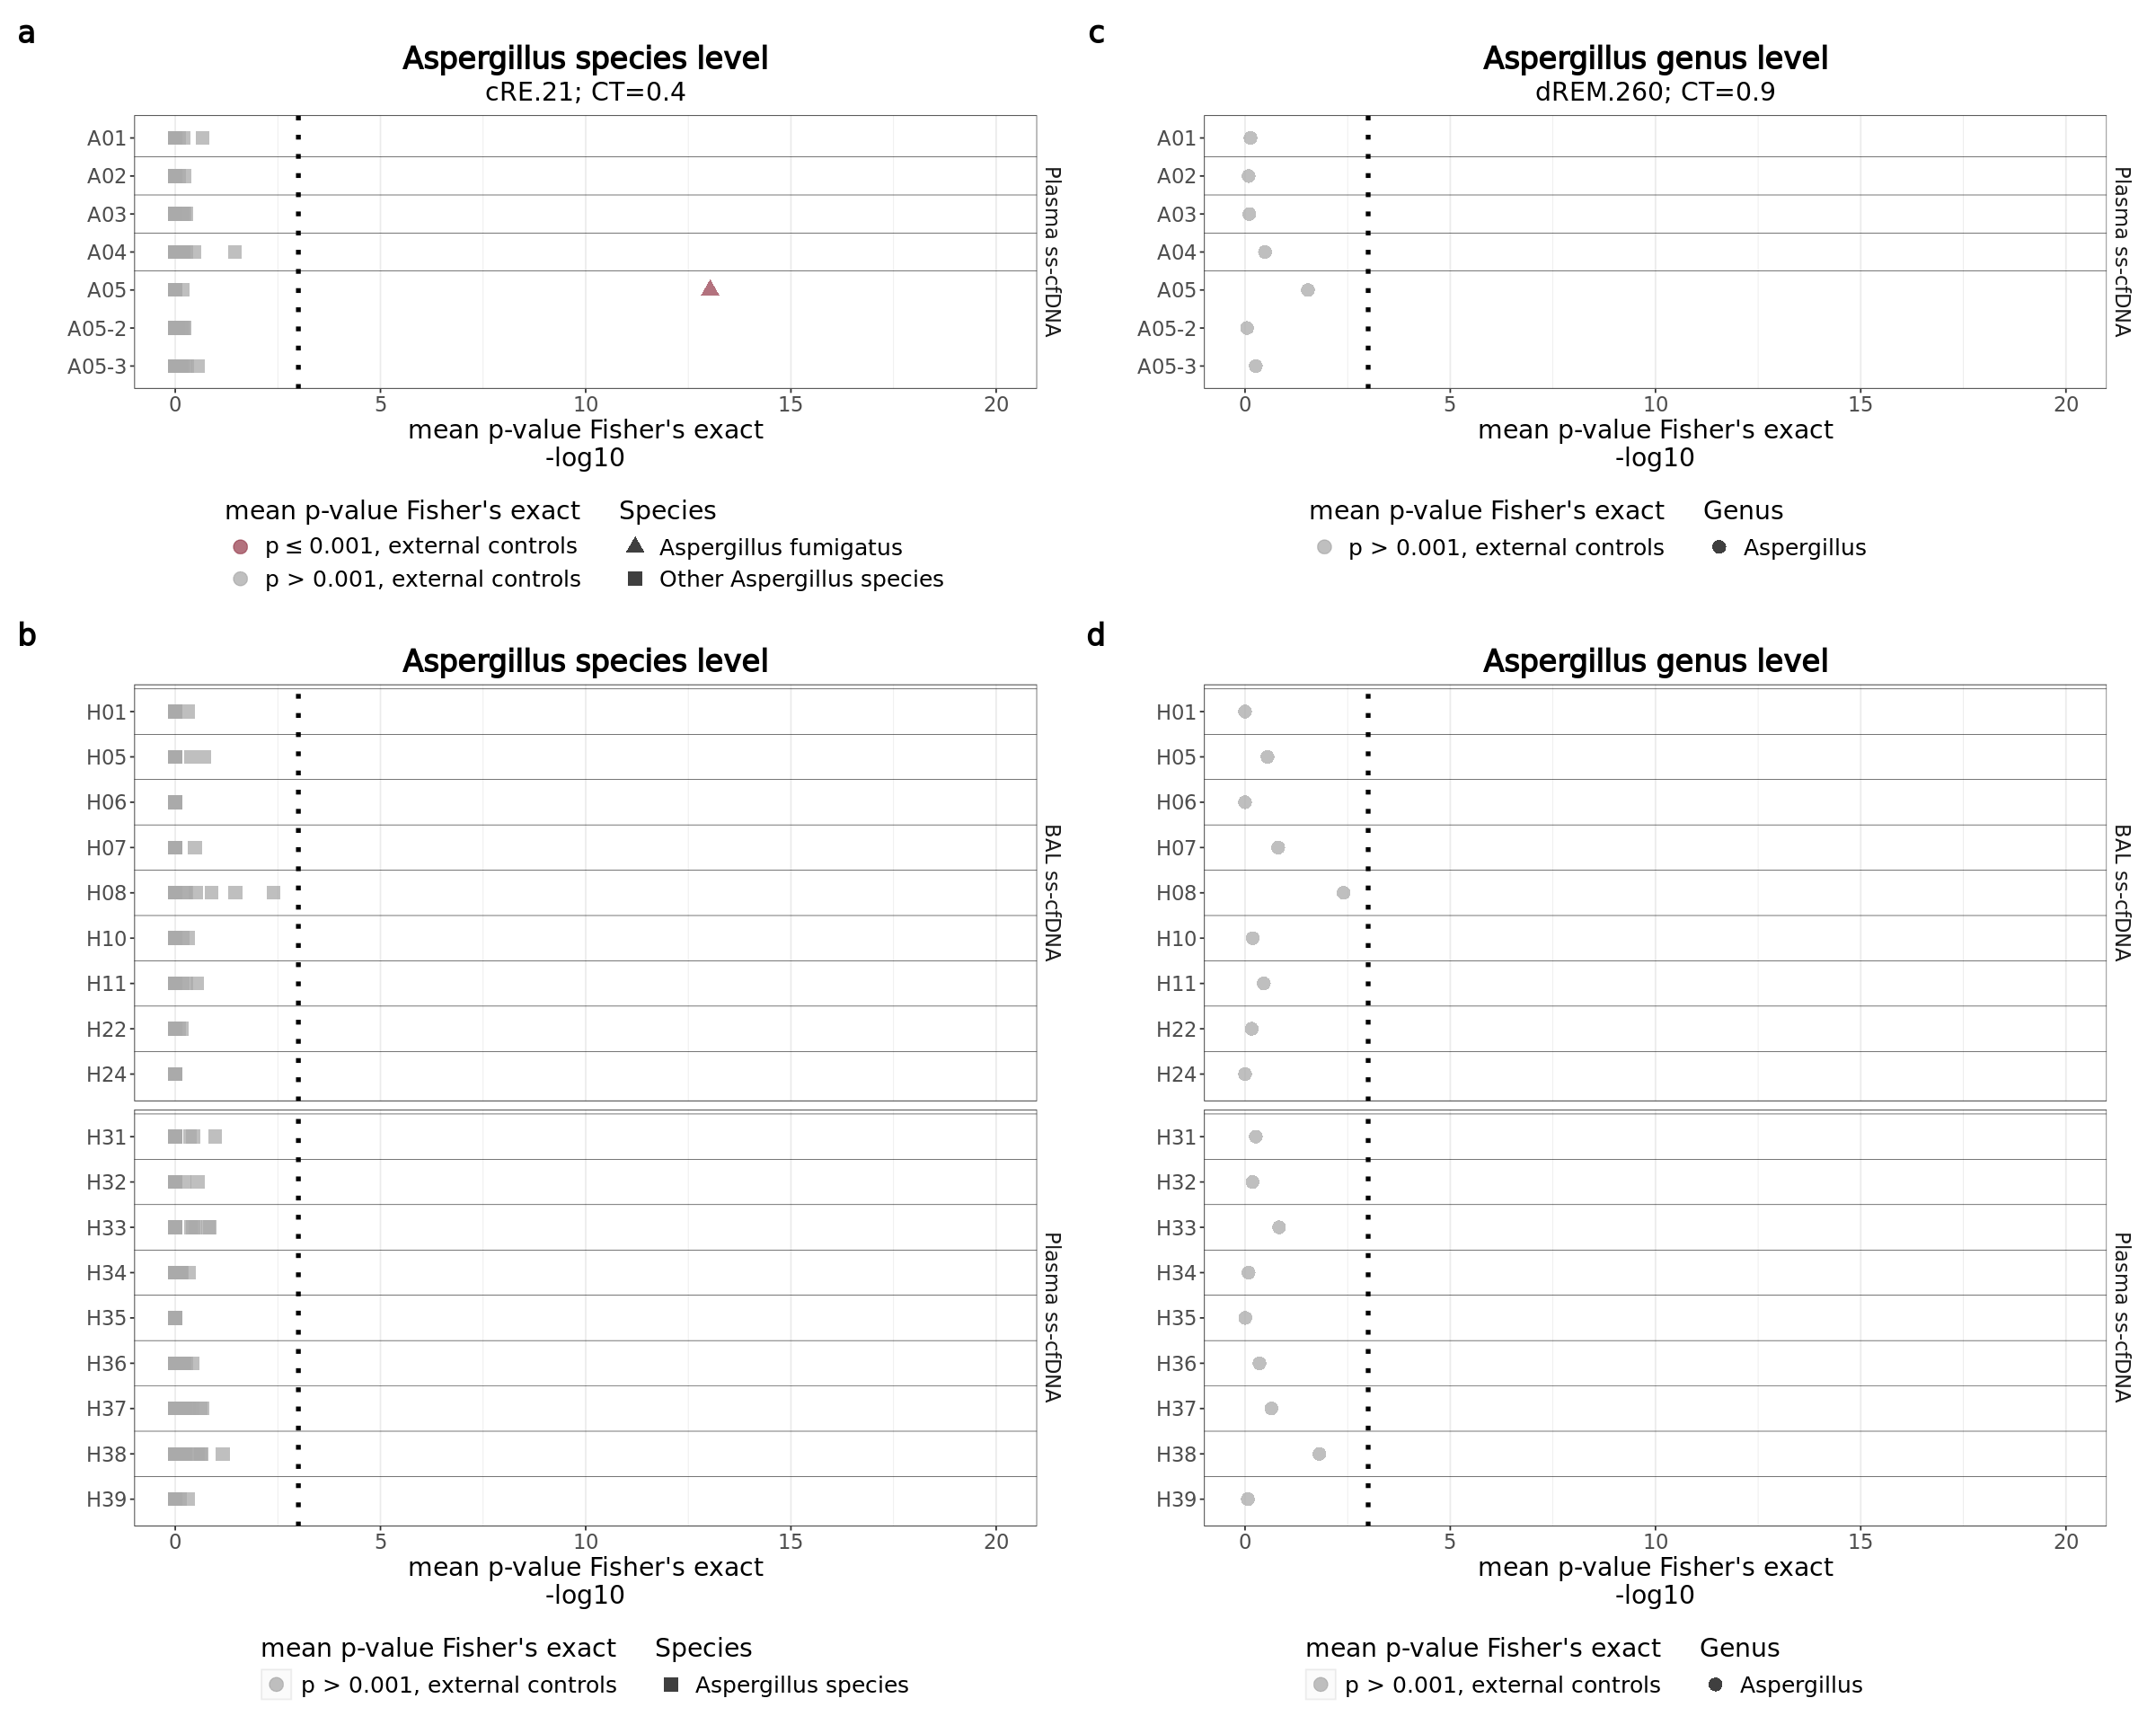

In [16]:
options(repr.plot.width=20, repr.plot.height=16) 
layout <- "AC
           BD"
SuplFig14 <- 
    (int_ctrls_fisher_species + labs(tag = 'a')) + 
    (ext_ctrls_fisher_species + labs(tag = 'b')) + 
    (int_ctrls_fisher_genus + labs(tag = 'c')) + 
    (ext_ctrls_fisher_genus + labs(tag = 'd')) + 
        plot_layout(nrow = 2, heights = c(1.3,4), design = layout) & 
        guides(size = 30) & 
        theme(legend.position='bottom', legend.justification='top', legend.direction = 'vertical',
            legend.key.size = unit(0.75, 'cm'), legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.75, 'cm'), 
            text = element_text(size = 17), legend.text = element_text(size = 15, colour = "black"),
            plot.title = element_text(size = 20, hjust = 0.5, face = "bold"), 
            plot.subtitle = element_text(size = 17, hjust = 0.5), 
            plot.tag = element_text(face = 'bold', size = 20), 
            strip.background = element_rect(fill="white", color = "white"),
            panel.grid.minor.y = element_blank(), panel.grid.major.y = element_blank()) &
            xlim(0,20)

SuplFig14

ggsave("../../output/suppl_figures/SuplFig14_R.png", 
       SuplFig14, width = 20, height = 16)
ggsave("../../output/suppl_figures/SuplFig14_R.pdf", 
       SuplFig14, width = 20, height = 16)